In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\project\chat_bot\data\raw\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
filtered_data = df[df["nameDest"].str.startswith("M")]
filtered_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [7]:
filtered_data['oldbalanceDest'].nunique()

1

In [8]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_per = (legit / (legit + fraud)) * 100
fraud_per = (fraud / (legit + fraud)) * 100

print("Number of Legit Transactions: ", legit)
print("Number of Fraud Transactions: ", fraud)
print("Percentage of Legit Transactions: {:.4f}%".format(legit_per))
print("Percentage of Fraud Transactions: {:.4f}%".format(fraud_per))

Number of Legit Transactions:  6354407
Number of Fraud Transactions:  8213
Percentage of Legit Transactions: 99.8709%
Percentage of Fraud Transactions: 0.1291%


In [9]:
new_df = df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<Axes: >

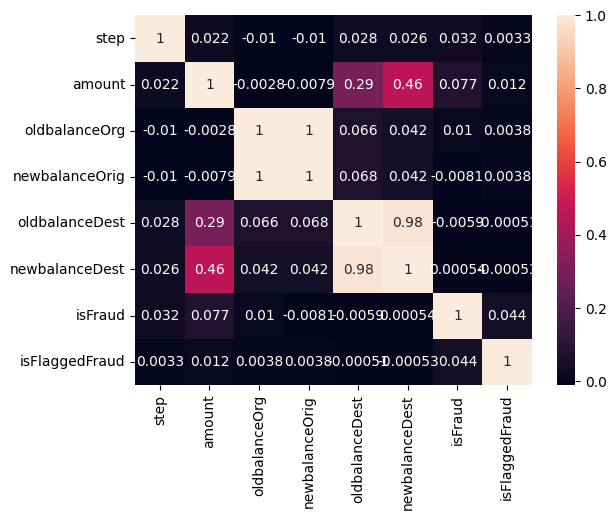

In [10]:
sns.heatmap(data= new_df.corr(numeric_only=True), annot= True)

In [11]:
num_attributes = new_df.select_dtypes(exclude='object')
cat_attributes = new_df.select_dtypes(include='object')

In [12]:
describle = num_attributes.describe().T

describle['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describle['variation coefficient'] = (num_attributes.std() / num_attributes.mean().tolist())
describle['skew'] = num_attributes.skew().tolist()
describle['kurtosis'] = num_attributes.kurtosis().tolist()

describle

,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew,kurtosis
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02,7.420000e+02,0.584772,0.375177,0.329071
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07,9.244552e+07,3.357344,30.993949,1797.956705
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07,5.958504e+07,3.463606,5.249136,32.964879
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07,4.958504e+07,3.419485,5.176884,32.066985
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08,3.560159e+08,3.088194,19.921758,948.674125
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08,3.561793e+08,2.999298,19.352302,862.156508
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00,1.000000e+00,27.815485,27.779538,769.702982
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00,1.000000e+00,630.605116,630.603629,397659.062500


In [13]:
cat_attributes.describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [14]:
new_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
new_df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Feature Engineering 

In [16]:
df1 = df.copy()
df1.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [17]:
df1['step_day'] = df1['step'].apply(lambda i : i / 24)
df1['step_week'] = df1['step'].apply(lambda i : i / (24*7))

df1['diff_new_old_origin'] = df1['newbalanceOrig'] - df1['oldbalanceOrg']

#difference between initial balance of recipient before the trainsaction and new balance of recipient after
df1['diff_new_old_destiny'] = df1['newbalanceDest']- df1['oldbalanceDest']

#name origin and name destiny
df1['nameOrig'] = df1['nameOrig'].apply(lambda i : i[0])
df1['nameDest'] = df1['nameDest'].apply(lambda i : i[0])

In [18]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_day,step_week,diff_new_old_origin,diff_new_old_destiny
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0,0.041667,0.005952,-9839.64,0.0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0,0.041667,0.005952,-1864.28,0.0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0,0.041667,0.005952,-181.00,0.0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0,0.041667,0.005952,-181.00,-21182.0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0,0.041667,0.005952,-11668.14,0.0


Exploratory Data Analysis (EDA)

In [19]:
df2  = df1.copy()

1.Univariate Analysis

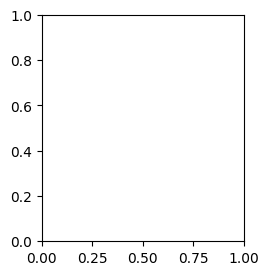

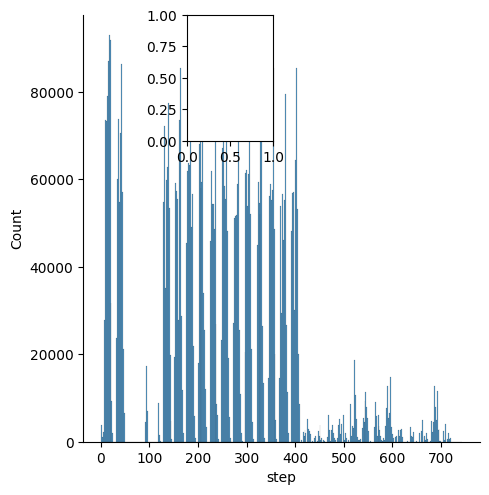

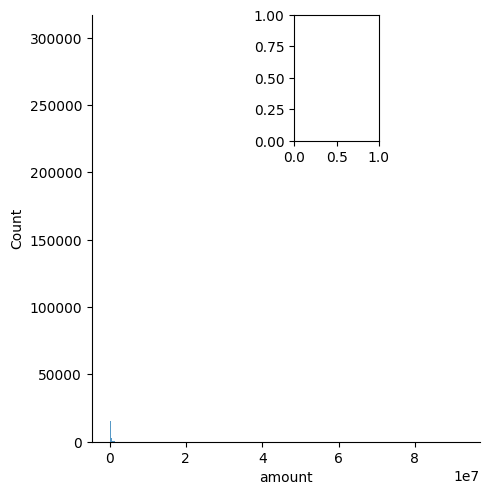

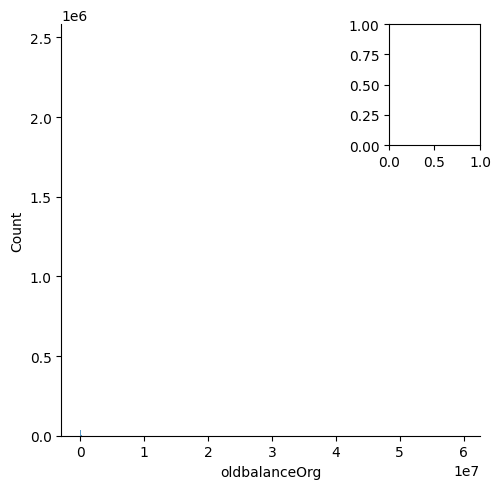

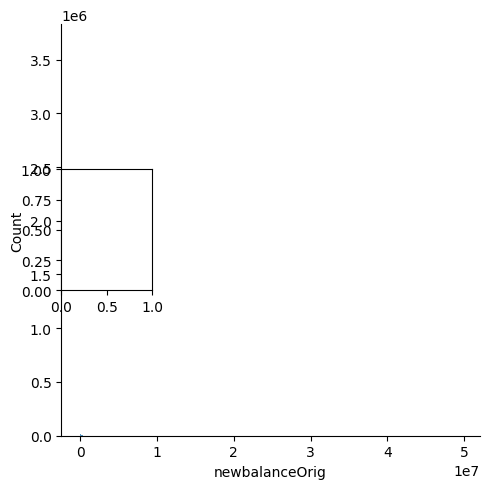

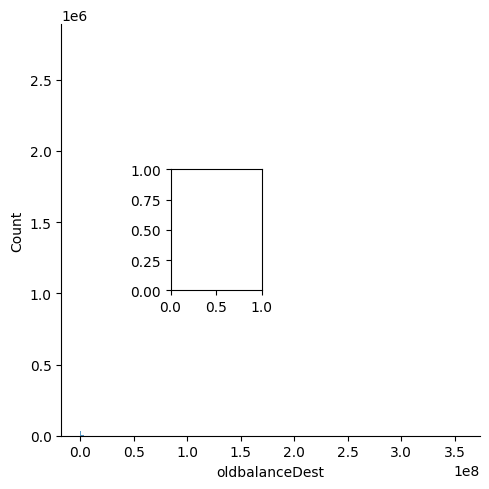

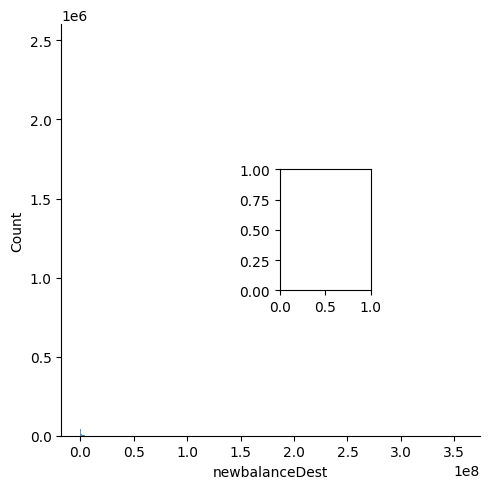

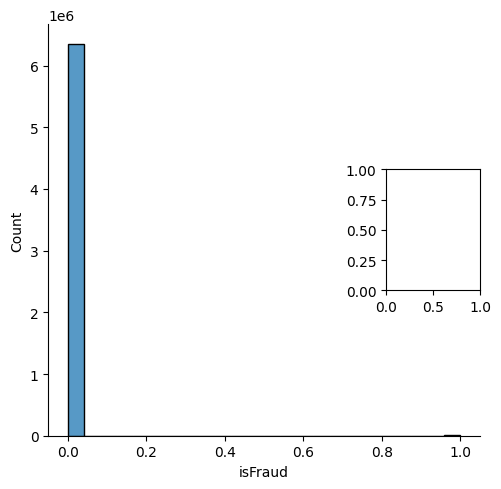

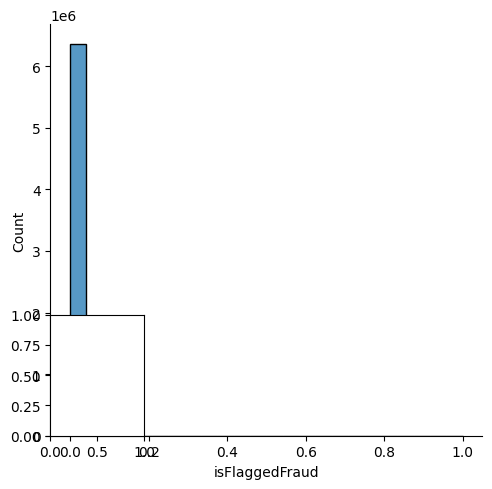

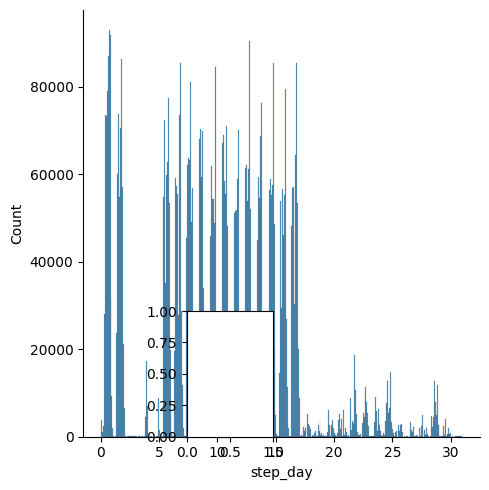

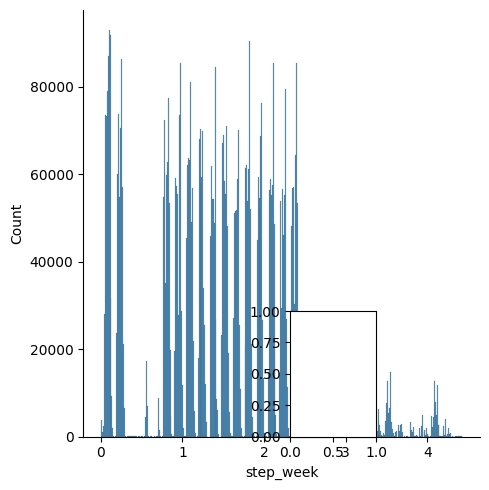

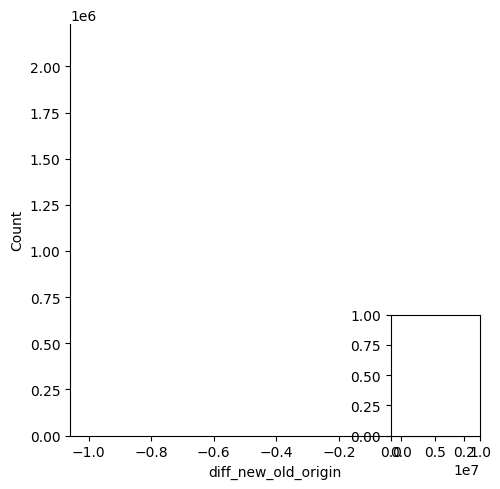

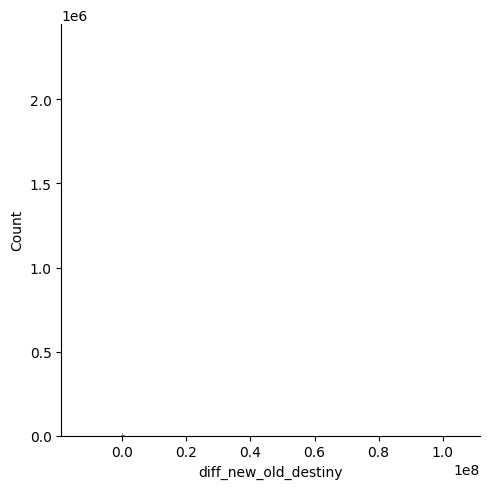

In [20]:
plt.figure(figsize=(12, 10))
num_attributes = df2.select_dtypes(exclude='object')
columns = num_attributes.columns.tolist()
j = 1

for colmn in columns:
    plt.subplot(3, 4, j)
    sns.displot(num_attributes[colmn])
    
    j += 1

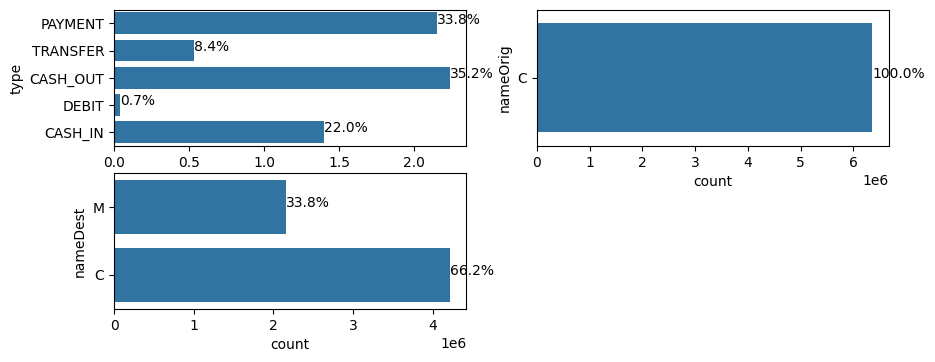

In [21]:
plt.figure(figsize=(10,6))
cat_attributes = df2.select_dtypes(include='object')
columns = cat_attributes.columns.tolist()
j = 1

for colmn in columns:
    plt.subplot(3, 2, j)
    ax = sns.countplot(y = colmn, data = cat_attributes)
    
    total = cat_attributes[colmn].size
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    j += 1

In [22]:
df2["nameOrig"].value_counts()

nameOrig
C    6362620
Name: count, dtype: int64

In [23]:
df2["nameDest"].value_counts()

nameDest
C    4211125
M    2151495
Name: count, dtype: int64

2.Bivariate Analysis

<Axes: xlabel='count', ylabel='nameOrig'>

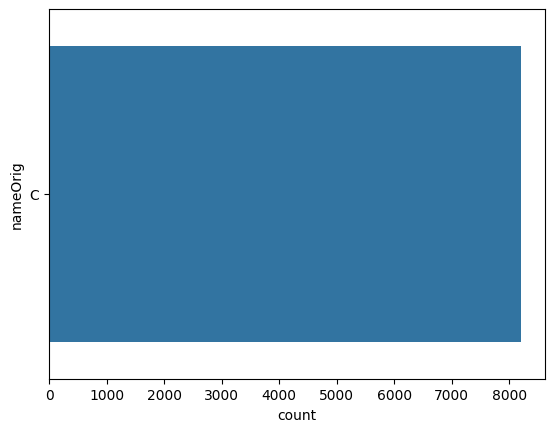

In [24]:
fraud = df2[df2['isFraud'] == True]
sns.countplot(y = 'nameOrig', data = fraud)

In [25]:
df2['nameOrig'][df2['isFraud'] == True].value_counts()


nameOrig
C    8213
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='nameDest'>

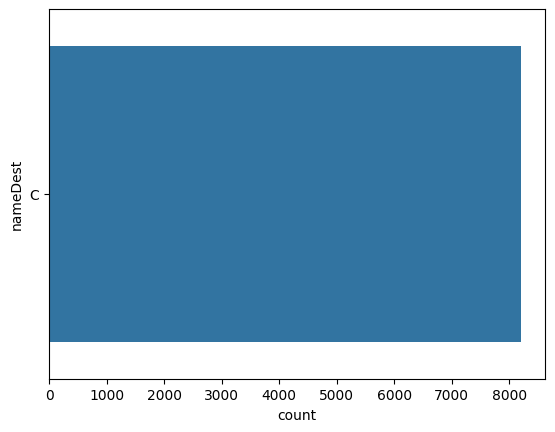

In [26]:
sns.countplot(y = 'nameDest', data = fraud)


In [27]:
df2['nameDest'][df2['isFraud'] == True].value_counts()

nameDest
C    8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='amount'>

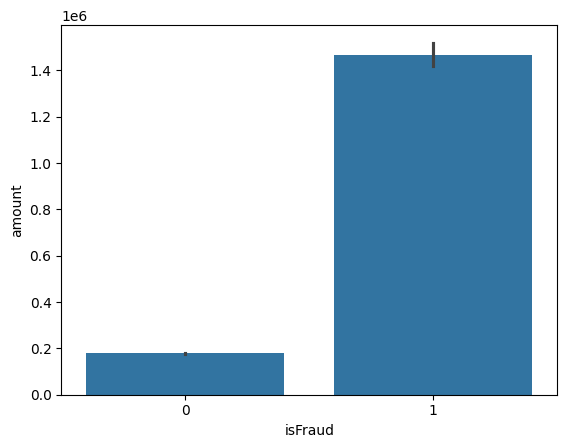

In [28]:
sns.barplot(y = 'amount', x = 'isFraud', data = df2)

In [29]:
faund = df2[df2['isFraud'] == True]
faund['amount'].max()

np.float64(10000000.0)

In [30]:
df2['amount'].max()

np.float64(92445516.64)

In [31]:
fraud['amount'].sum()

np.float64(12056415427.839998)

In [32]:
df2['amount'].sum()

np.float64(1144392944759.77)

In [33]:
faund['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

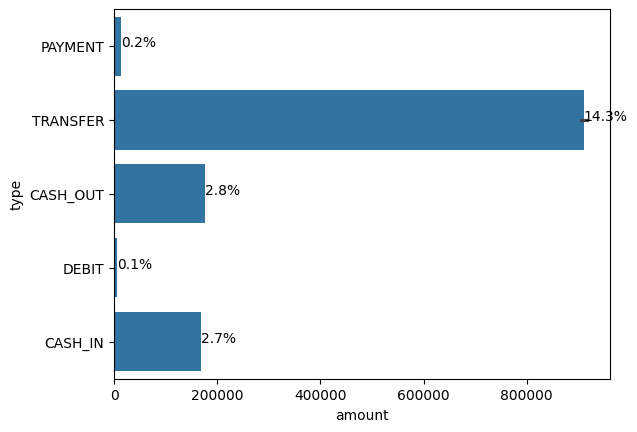

In [35]:
ax = sns.barplot(y = 'type', x = 'amount', data = df2)

total = df2['type'].size
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

3.Multivariaty Analysis

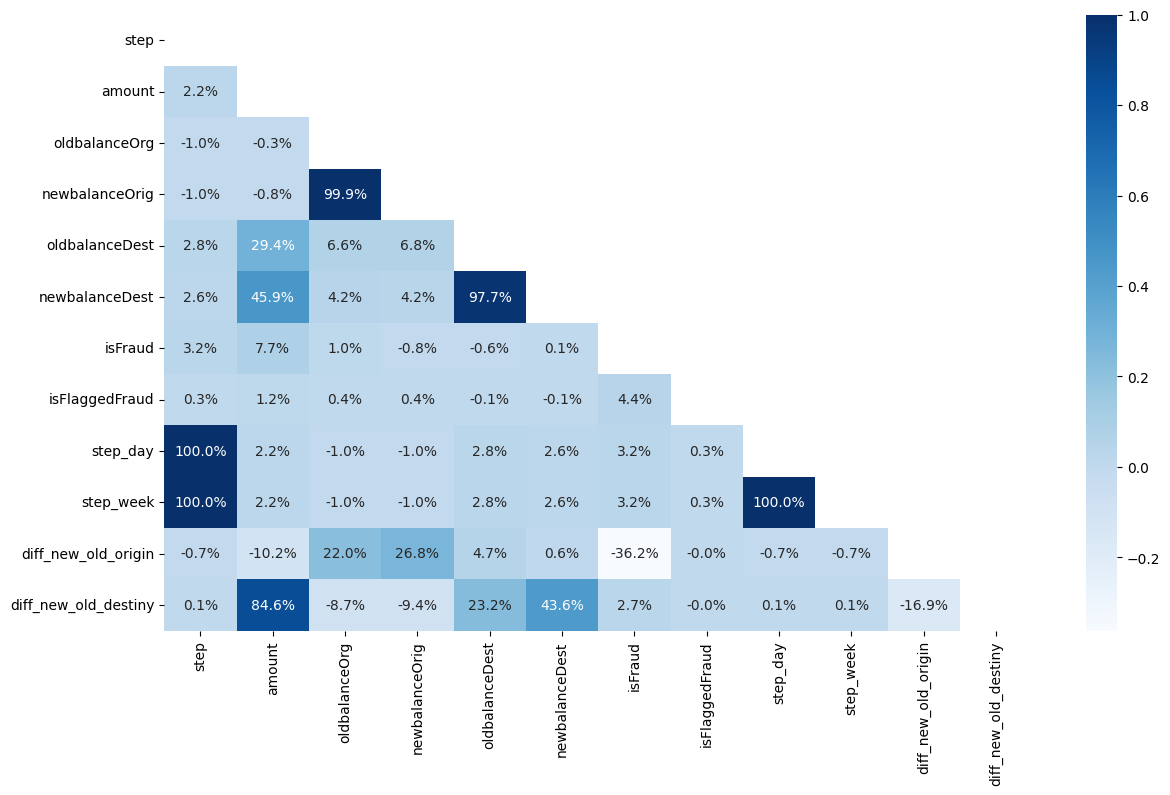

In [36]:
plt.figure(figsize=(14, 8))
mask = np.triu(np.ones_like(df2.corr(numeric_only=True)))
sns.heatmap(df2.corr(numeric_only=True), cmap='Blues', annot=True, fmt = ".1%", mask = mask)
plt.show()

Feature Selection

In [37]:
df3 = df2.copy()

In [38]:
df3.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_day,step_week,diff_new_old_origin,diff_new_old_destiny
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0,0.041667,0.005952,-9839.64,0.0


In [39]:
df3.drop(columns=['isFlaggedFraud', 'nameOrig', 'nameDest'],axis =1, inplace=True) 

In [40]:
df3.drop(columns=['step_day', 'step_week'], axis=1, inplace=True)

In [41]:
df3.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'diff_new_old_origin',
       'diff_new_old_destiny'],
      dtype='object')

one hot encoding

In [42]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols = ['type'], use_cat_names=True)
df3 = encoder.fit_transform(df3)
df3.head(5)

,step,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diff_new_old_origin,diff_new_old_destiny
0,1,1,0,0,0,0,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0
1,1,1,0,0,0,0,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0
2,1,0,1,0,0,0,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0
3,1,0,0,1,0,0,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0
4,1,1,0,0,0,0,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0


In [43]:
from sklearn.preprocessing import MinMaxScaler

num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
               'diff_new_old_origin', 'diff_new_old_destiny']
scaler = MinMaxScaler()
df3[num_columns] = scaler.fit_transform(df3[num_columns])
df3.head(5)

,step,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diff_new_old_origin,diff_new_old_destiny
0,1,1,0,0,0,0,0.000106,0.002855,0.003233,0.000000,0.0,0,0.838434,0.109987
1,1,1,0,0,0,0,0.000020,0.000357,0.000391,0.000000,0.0,0,0.839103,0.109987
2,1,0,1,0,0,0,0.000002,0.000003,0.000000,0.000000,0.0,1,0.839244,0.109987
3,1,0,0,1,0,0,0.000002,0.000003,0.000000,0.000059,0.0,1,0.839244,0.109809
4,1,1,0,0,0,0,0.000126,0.000697,0.000603,0.000000,0.0,0,0.838280,0.109987


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    
    #calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

calc_vif(df3)

,variables,VIF
0,step,1.003447
1,type_PAYMENT,inf
2,type_TRANSFER,inf
3,type_CASH_OUT,inf
4,type_DEBIT,inf
5,type_CASH_IN,inf
6,amount,4.073803
7,oldbalanceOrg,inf
8,newbalanceOrig,inf
9,oldbalanceDest,inf


In [45]:
df4 = df3.drop(columns=['oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig'], axis=1)
calc_vif(df4) 

,variables,VIF
0,step,1.002571
1,type_PAYMENT,3116.052988
2,type_TRANSFER,770.462852
3,type_CASH_OUT,3231.288282
4,type_DEBIT,61.049486
5,type_CASH_IN,2079.723967
6,amount,3.984381
7,isFraud,1.223207
8,diff_new_old_origin,1.719308
9,diff_new_old_destiny,3.864783


In [46]:
df4 = df4.drop(['type_CASH_OUT'], axis=1)
calc_vif(df4)

,variables,VIF
0,step,3.931789
1,type_PAYMENT,1.995369
2,type_TRANSFER,1.385264
3,type_DEBIT,1.019228
4,type_CASH_IN,1.995942
5,amount,4.025700
6,isFraud,1.015447
7,diff_new_old_origin,877.501075
8,diff_new_old_destiny,882.969077


In [47]:
df4 = df4.drop(['diff_new_old_destiny'], axis=1)
calc_vif(df4)

,variables,VIF
0,step,3.929736
1,type_PAYMENT,1.994323
2,type_TRANSFER,1.384443
3,type_DEBIT,1.019228
4,type_CASH_IN,1.650465
5,amount,1.284020
6,isFraud,1.009653
7,diff_new_old_origin,5.836177


Model Building

In [48]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [49]:
x = df4.drop('isFraud', axis=1)
y = df4['isFraud']

#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)

shape of X_train:  (4453834, 7)
shape of X_test:  (1908786, 7)


Model traning

In [50]:
# Decision tree 

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100

In [51]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators= 10)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100

Evaluation 

In [53]:
print("Decision Tree Classifier Score:" , decision_tree_score)
print("Random Forest Classifier Score:" , random_forest_score)

Decision Tree Classifier Score: 99.89663587222455
Random Forest Classifier Score: 99.92869813588324


In [54]:
# ======================
# XGBoost Classifier
# ======================
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_score = xgb_model.score(X_test, y_test) * 100

# Evaluation
print("Decision Tree Classifier Score:", decision_tree_score)
print("Random Forest Classifier Score:", random_forest_score)
print("XGBoost Classifier Score:", xgb_score)


Decision Tree Classifier Score: 99.89663587222455
Random Forest Classifier Score: 99.92869813588324
XGBoost Classifier Score: 99.918482218541


In [55]:
print("\n=== XGBoost Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


=== XGBoost Evaluation ===
Confusion Matrix:
 [[1906059     292]
 [   1264    1171]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.80      0.48      0.60      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.74      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



In [56]:
#key term of confustion matrix -dt

print("TP, FP, TN, FN - Decision Tree")
tn , fp , fn , tp = confusion_matrix(y_test, y_pred_dt).ravel()
print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")




TP, FP, TN, FN - Decision Tree
True Positive: 1467
False Positive: 1005
True Negative: 1905346
False Negative: 968


In [57]:
print("TP, FP, TN, FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")


TP, FP, TN, FN - Random Forest
True Positive: 1298
False Positive: 224
True Negative: 1906127
False Negative: 1137


In [58]:
#classification report - dt

classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.59      0.60      0.60      2435

    accuracy                           1.00   1908786
   macro avg       0.80      0.80      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



In [59]:
#classification report - RF

classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.85      0.53      0.66      2435

    accuracy                           1.00   1908786
   macro avg       0.93      0.77      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786



In [62]:
# Lưu model
import joblib
joblib.dump(random_forest, "D:\project\chat_bot\models/random_forest_model.pkl")

['D:\\project\\chat_bot\\models/random_forest_model.pkl']

In [ ]:

# Lưu model
# joblib.dump(decision_tree, "models/decision_tree_model.pkl")
# joblib.dump(xgb_model, "models/xgboost_fraud_model.pkl")

In [ ]:
# Load model lại để dùng
# loaded_dt = joblib.load("models/decision_tree_model.pkl")
loaded_rf = joblib.load("models/random_forest_model.pkl")
# loaded_xgb = joblib.load("models/xgboost_fraud_model.pkl")
# Kiểm tra load thành công
# print(loaded_dt.predict(X_test[:5]))
print(loaded_rf.predict(X_test[:5]))
# print(loaded_xgb.predict(X_test[:5]))
